LSTM predicting Next Day stock of GOOGL

---



/tmp/ipython-input-1245460562.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('GOOGL', start='2010-01-01', end='2024-01-01')
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Price           Close       High        Low       Open     Volume
Ticker          GOOGL      GOOGL      GOOGL      GOOGL      GOOGL
Date                                                             
2010-01-04  15.576998  15.645595  15.514616  15.581968   78169752
2010-01-05  15.508402  15.604089  15.447511  15.587685  120067812
2010-01-06  15.117455  15.554878  15.070233  15.554878  158988852
2010-01-07  14.765529  15.160702  14.729492  15.145789  256315428
2010-01-08  14.962370  14.992939  14.641509  14.713336  188783028
X_train shape: (2757, 60, 1)), y_train shape: (2757, 1)
Epoch 1/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 0.0068 - val_loss: 0.0013
Epoch 2/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - loss: 1.2875e-04 - val_loss: 0.0019
Epoch 3/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 1.6760e-04 - val_loss: 0.0012
Epoch 4/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - loss: 1.5844e-04 - val_loss: 0.0011
Epoch 5/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 1.377

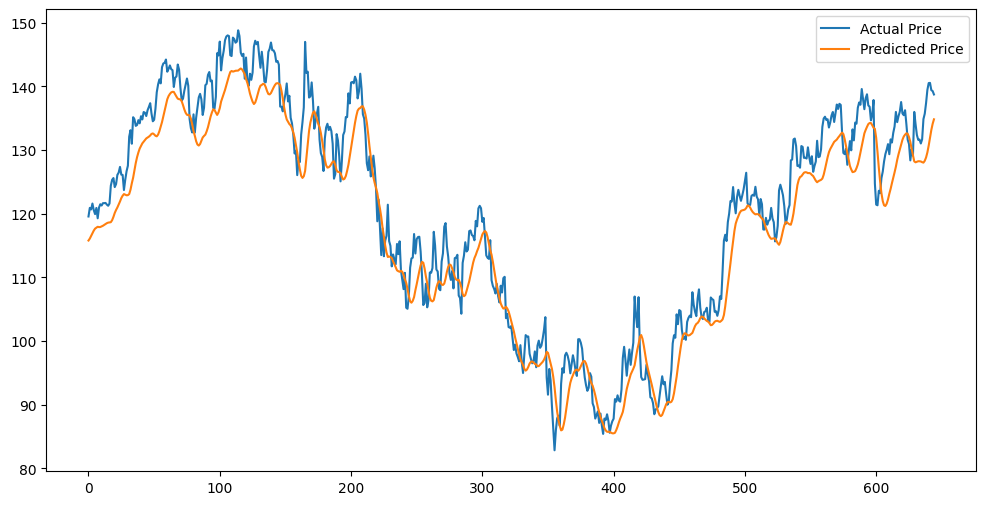

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
prediction next days price for GOOL: $135.28


In [8]:
        #IMport libraries
        import numpy as np
        import pandas as pd
        import matplotlib.pyplot as plt
        import yfinance as yf
        from tensorflow.keras.models import Sequential
        from tensorflow.keras.layers import Dense, LSTM
        from sklearn.preprocessing import MinMaxScaler
        from sklearn.metrics import mean_squared_error

        # Download google stock
        df = yf.download('GOOGL', start='2010-01-01', end='2024-01-01')
        print(df.head())

        # focus on close
        data= df['Close'].values.reshape(-1,1)

        #preprocess data
        scaler = MinMaxScaler(feature_range=(0,1))
        data = scaler.fit_transform(data)

        #split into train & test
        train_size = int(len(data) * 0.8)
        train_data = data[:train_size]
        test_data = data[train_size:]

        #create sequences
        def create_sequences(data,sequence_length):
          X, y = [],[]
          for i in range(len(data) - sequence_length):
            X.append(data[i:i+sequence_length])
            y.append(data[i+sequence_length])
          return np.array(X), np.array(y)

        sequence_length = 60
        X_train, y_train = create_sequences(train_data, sequence_length)
        X_test, y_test = create_sequences(test_data, sequence_length)

        #Reshape input for LSTM
        print(f'X_train shape: {X_train.shape}), y_train shape: {y_train.shape}')

        #build & compile the model
        model = Sequential([
            LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)),
            LSTM(50, return_sequences=False),
            Dense(25),
            Dense(1)
        ])

        # compile the model
        model.compile(optimizer="adam", loss='mean_squared_error')

        #train the model
        history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

        #evaluate & visualize prediction
        predictions = model.predict(X_test)
        predictions = scaler.inverse_transform(predictions) # convert back to original scale

        # convert y_test to original scale
        y_test = scaler.inverse_transform(y_test.reshape(-1,1))

        # plot predictions & actual prices
        plt.figure(figsize=(12,6))
        plt.plot( y_test, label='Actual Price')
        plt.plot(predictions, label='Predicted Price')
        plt.legend()
        plt.show()

        # use the last sequences from the scaled data
        last_sequences = data[-sequence_length:].reshape(1,sequence_length, 1)

        # predict the next days prices
        next_day_prediction = model.predict(last_sequences)
        next_day_price = scaler.inverse_transform(next_day_prediction)
        print(f'prediction next days price for GOOL: ${next_day_price[0][0]:.2f}')

RNN predicting next day stock of GOOGL

---



/tmp/ipython-input-1548593807.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('GOOGL', start='2010-01-01', end='2024-01-01')
[*********************100%***********************]  1 of 1 completed


Price           Close       High        Low       Open     Volume
Ticker          GOOGL      GOOGL      GOOGL      GOOGL      GOOGL
Date                                                             
2010-01-04  15.576998  15.645595  15.514616  15.581968   78169752
2010-01-05  15.508402  15.604089  15.447511  15.587685  120067812
2010-01-06  15.117455  15.554879  15.070234  15.554879  158988852
2010-01-07  14.765529  15.160702  14.729492  15.145789  256315428
2010-01-08  14.962369  14.992938  14.641508  14.713335  188783028
X_train shape: (2757, 60, 1), y_train shape: (2757, 1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - loss: 0.0403 - val_loss: 0.0257
Epoch 2/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.0654e-04 - val_loss: 0.0160
Epoch 3/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.6877e-04 - val_loss: 0.0081
Epoch 4/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.8799e-04 - val_loss: 0.0072
Epoch 5/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.4632e-04 - val_loss: 0.0044
Epoch 6/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.5199e-04 - val_loss: 0.0022
Epoch 7/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.8103e-04 - val_loss: 0.0029
Epoch 8/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.0436e-04 - val_loss: 0.0033
Epoch 9/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.0983e-04 - val_loss: 0.0013
Epoch 10/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.1774e-04 - val_loss: 0.0062
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


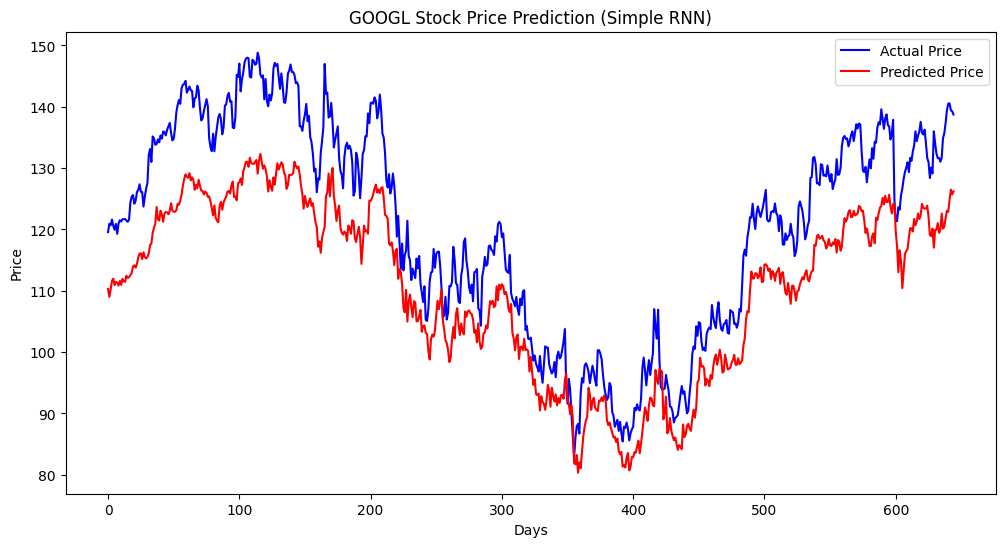

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step
prediction next days price for GOOGL: $126.45


In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Download google stock
df = yf.download('GOOGL', start='2010-01-01', end='2024-01-01')
print(df.head())

# focus on close
data = df['Close'].values.reshape(-1, 1)

# preprocess data
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

# split into train & test
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

# create sequences
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

sequence_length = 60
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Reshape input for RNN (same 3D shape requirements as LSTM)
print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape}')

# build & compile the model
model = Sequential([
    # Changed LSTM to SimpleRNN
    SimpleRNN(50, return_sequences=True, input_shape=(sequence_length, 1)),
    # Changed LSTM to SimpleRNN
    SimpleRNN(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

# compile the model
model.compile(optimizer="adam", loss='mean_squared_error')

# train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

# evaluate & visualize prediction
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions) # convert back to original scale

# convert y_test to original scale
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# plot predictions & actual prices
plt.figure(figsize=(12, 6))
plt.plot(y_test_scaled, label='Actual Price', color='blue')
plt.plot(predictions, label='Predicted Price', color='red')
plt.title('GOOGL Stock Price Prediction (Simple RNN)')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

# use the last sequences from the scaled data
last_sequences = data[-sequence_length:].reshape(1, sequence_length, 1)

# predict the next days prices
next_day_prediction = model.predict(last_sequences)
next_day_price = scaler.inverse_transform(next_day_prediction)
print(f'prediction next days price for GOOGL: ${next_day_price[0][0]:.2f}')

Using google stock analysis data the loss of both models showed that LSTM outperformed RNN as it has both cell memory & hidden memory like RNN
As we saw in the previous results RNN predicted next day price 126.54 while LSTM predicted 138.23$
---


Final Results

LSTM test Loss: 0.000879

RNN test Loss:  0.002384

Winner: LSTM performed better

/tmp/ipython-input-88078412.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('GOOGL', start='2010-01-01', end='2024-01-01')
[*********************100%***********************]  1 of 1 completed


 Training LSTM Model
Epoch 1/10



/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0109 - val_loss: 0.0013
Epoch 2/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.6954e-04 - val_loss: 0.0013
Epoch 3/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.4573e-04 - val_loss: 0.0014
Epoch 4/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.5185e-04 - val_loss: 0.0016
Epoch 5/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.3281e-04 - val_loss: 0.0012
Epoch 6/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.2554e-04 - val_loss: 0.0010
Epoch 7/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.1691e-04 - val_loss: 0.0012
Epoch 8/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.2982e-04 - val_loss: 0.0012
Epoch 9/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.1615e-04 - val_loss: 0.0011
Epoch 10/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.0367e-04 - val_loss: 8.7872e-04

 Training Simple RNN Model
Epoch 1/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0777 - val_loss: 0.0153
Epoch 2/10
87

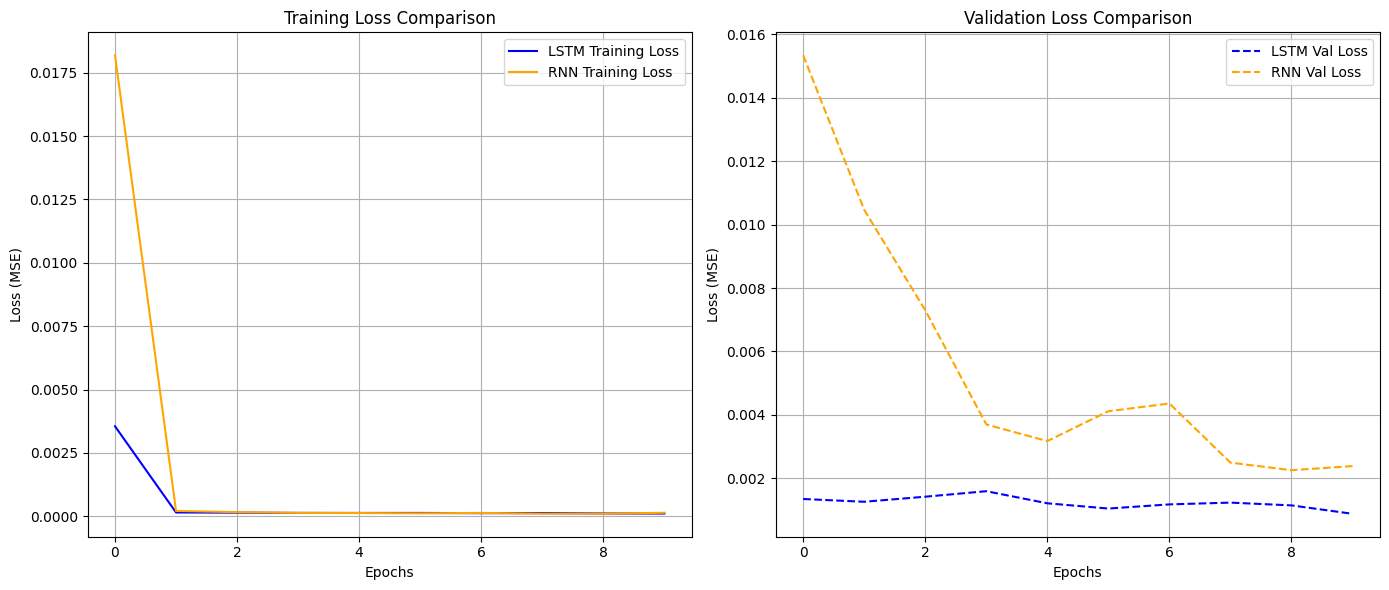


 Final Results 
LSTM test Loss: 0.000879
RNN test Loss:  0.002384
Winner: LSTM performed better


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN
from sklearn.preprocessing import MinMaxScaler

# 1. DATA PREPARATION
print("Downloading Data")
df = yf.download('GOOGL', start='2010-01-01', end='2024-01-01')
data = df['Close'].values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

sequence_length = 60
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# 2. TRAIN LSTM MODEL
print("\n Training LSTM Model")
model_lstm = Sequential([
    LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
# Capture the history to plot later
history_lstm = model_lstm.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test), verbose=1)

# 3. TRAIN RNN MODEL
print("\n Training Simple RNN Model")
model_rnn = Sequential([
    SimpleRNN(50, return_sequences=True, input_shape=(sequence_length, 1)),
    SimpleRNN(50, return_sequences=False),
    Dense(25),
    Dense(1)
])
model_rnn.compile(optimizer='adam', loss='mean_squared_error')
# Capture the history to plot later
history_rnn = model_rnn.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test), verbose=1)

# 4. PLOT COMPARISON
plt.figure(figsize=(14, 6))

# Plot Training Loss
plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['loss'], label='LSTM Training Loss', color='blue')
plt.plot(history_rnn.history['loss'], label='RNN Training Loss', color='orange')
plt.title('Training Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)

# Plot Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['val_loss'], label='LSTM Val Loss', color='blue', linestyle='--')
plt.plot(history_rnn.history['val_loss'], label='RNN Val Loss', color='orange', linestyle='--')
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Final Evaluation Printout
loss_lstm = model_lstm.evaluate(X_test, y_test, verbose=0)
loss_rnn = model_rnn.evaluate(X_test, y_test, verbose=0)

print("\n Final Results ")
print(f"LSTM test Loss: {loss_lstm:.6f}")
print(f"RNN test Loss:  {loss_rnn:.6f}")

if loss_lstm < loss_rnn:
    print("Winner: LSTM performed better")
else:
    print("Winner: RNN performed better")

LSTM for sentiment Analysis

Loading IMDB data...
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training samples: 25000
Test samples: 25000
Shape of data after padding: (25000, 200)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None

Starting Training
Epoch 1/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 603s 758ms/step - accuracy: 0.7284 - loss: 0.5250 - val_accuracy: 0.8429 - val_loss: 0.3680
Epoch 2/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 587s 751ms/step - accuracy: 0.8618 - loss: 0.3450 - val_accuracy: 0.8491 - val_loss: 0.3542
Epoch 3/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 624s 754ms/step - accuracy: 0.8978 - loss: 0.2614 - val_accuracy: 0.8644 - val_loss: 0.3422


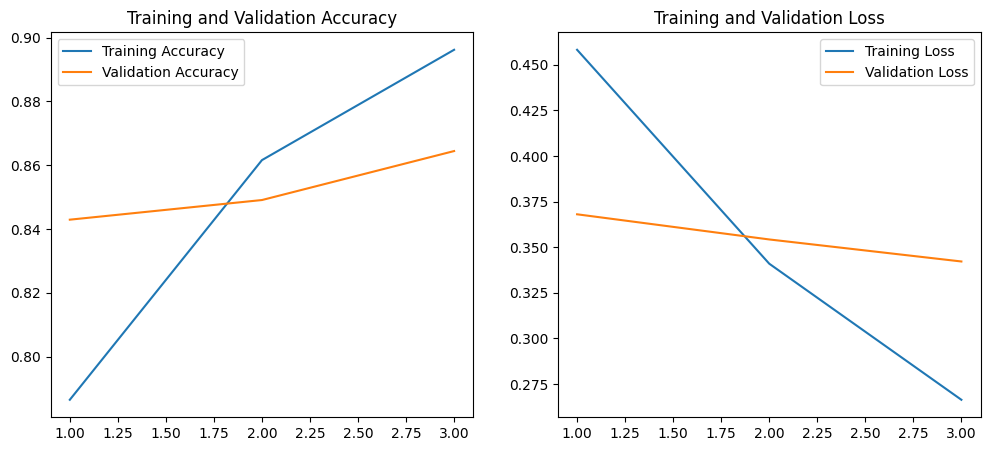


Final Test Accuracy: 86.44%
Final Test Loss: 0.3422


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding

# LOAD DATASET
# We keep only the top 10,000 most frequently used words
vocab_size = 10000
print("Loading IMDB data...")
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")

# PREPROCESSING
# LSTMs expect input sequences to be of the same length
# We cut off reviews after 200 words or pad them with 0s if shorter
max_length = 200
X_train = pad_sequences(X_train, maxlen=max_length)
X_test = pad_sequences(X_test, maxlen=max_length)

print(f"Shape of data after padding: {X_train.shape}")

# BUILD LSTM MODEL
embedding_dim = 128

model = Sequential([
    # Embedding Layer: Turns integers (words) into dense vectors of fixed size
    # Input dim: vocab_size (10,000), Output dim: 128 vector size
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),

    # LSTM Layer
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),

    # Dense Layer
    # Activation is 'sigmoid' because we want a result between 0 and 1
    Dense(1, activation='sigmoid')
])

# Compile
# We use 'binary_crossentropy' because this is a Yes/No classification task
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

#  TRAIN THE MODEL
print("\nStarting Training")
batch_size = 32
epochs = 3 # Kept low for demonstration speed can increase for better accuracy

history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_test, y_test))

#  VISUALIZE RESULTS
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, epochs + 1)

plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

#  EVALUATION
score, acc = model.evaluate(X_test, y_test, verbose=0)
print(f'\nFinal Test Accuracy: {acc*100:.2f}%')
print(f'Final Test Loss: {score:.4f}')